##### 羅吉斯迴歸

我們先來設想一個情境。我們經營一家賣衣服的商店，裡面有賣成年人和孩童的衣服。我們在入口處設置了一個監視器，可以用來量測顧客的身高。我們怎麼透過身高來知道進來的是成年人還是孩童呢？

我們判斷的規則就可能是，低於160公分的是孩童，高於160公分的為成年人。這就是屬於分類的預測規則，跟數值的預測有所不同。數字的預測輸出是數值。譬如身高。而類別的預測輸出的是類別。譬如男女。因此在進行機器學習之前，我們要先了解，自己要預測的是數值的預測還是類別的歸類。  

由於迴歸本身無法來做分類，聰明的科學家就在資料的輸出y動了手腳，加入Sigmoid函數，如此就能將輸出的範圍限定在0和1之間(圖見下個例子)。當輸出的值高於某個門檻，如0.5就預測是1，低於0.5就預測是0。這就是羅吉斯迴歸的原理。羅吉斯迴歸的核心仍是線性迴歸，因此它僅能做線性的分類預測。看似不怎麼樣，但當數據是線性可分類時，它的預測表現是非常好。羅吉斯迴歸常用在醫療領域，是被廣泛運用的演算法。

範例： Sigmoid函數繪圖   
從圖形上可以看出Sigmoid函數的幾個特點。第一，函數的輸出值在-1跟1之間。第二，函數是對稱的。因此，通常我們判斷切割點是在x等於0，或是y等於0.5的點。當x大於0或者是y大於0.5的時候，我們就判斷為1。反之則為0。

In [157]:
# 中文處理
# !wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
# !unzip "simhei.zip"
# !rm "simhei.zip"
# from matplotlib.font_manager import FontProperties
# myfont = FontProperties(fname=r'SimHei.ttf')

# def plot_chinese(ax):
#     labels = ax.get_xticklabels()+ax.legend().texts+[ax.title]+[ax.xaxis.get_label()]
#     for label in labels :
#         label.set_fontproperties(myfont)

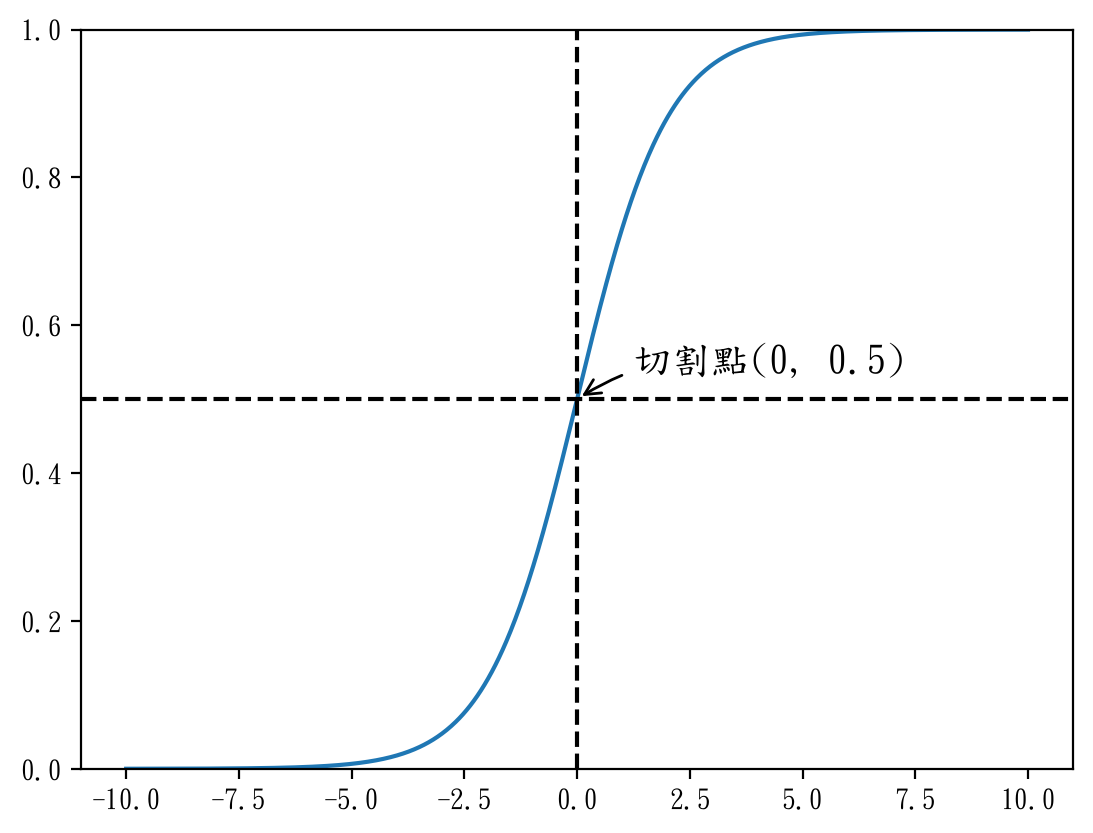

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams['font.sans-serif'] = ['DFKai-sb']
# plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

x = np.linspace(-10,10,1000)
# sigmoid function
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.axhline(0.5, c='k', ls='--')
plt.axvline(0, c='k', ls='--')
plt.annotate('切割點(0, 0.5)', xy=(0,0.5), fontsize=14,
             xytext=(20,10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))
plt.ylim(0,1);

In [159]:
from sklearn.datasets import load_iris
iris = load_iris()

In [160]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [161]:
print('\n'.join(iris['DESCR'].split('\n')[:18]))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica


In [162]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [163]:
df = df[['sepal width (cm)', 'petal length (cm)','target']]
df = df.iloc[50:]
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [164]:
df['target'].value_counts()

target
1    50
2    50
Name: count, dtype: int64

In [165]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 50 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal width (cm)   100 non-null    float64
 1   petal length (cm)  100 non-null    float64
 2   target             100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.1 KB


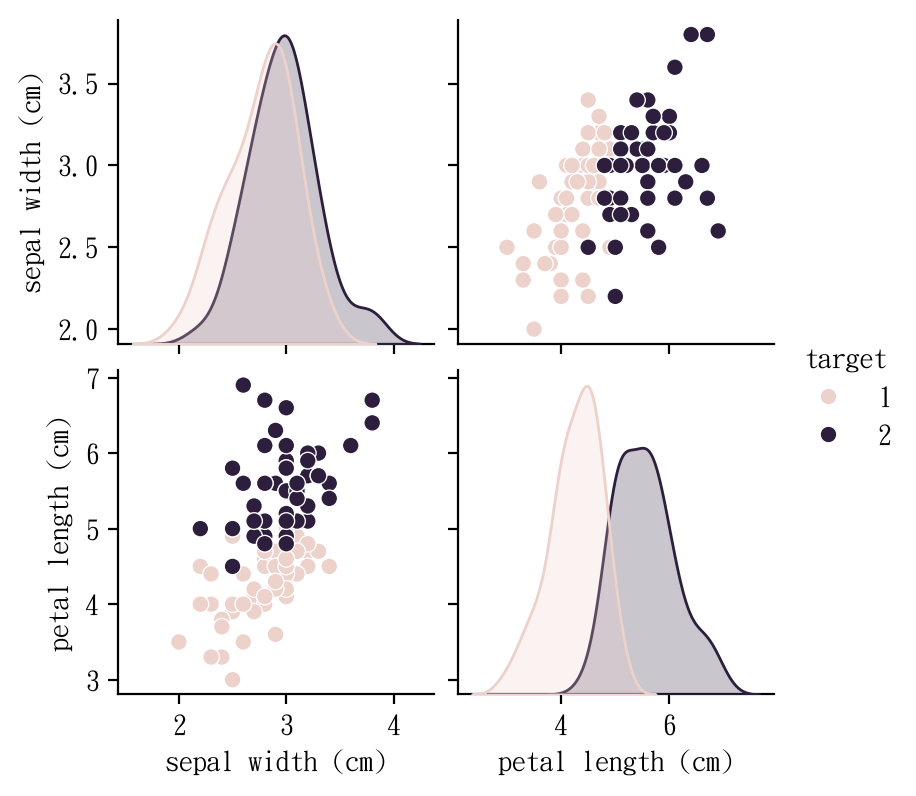

In [167]:
sns.pairplot(df,hue='target', vars=['sepal width (cm)', 'petal length (cm)'], size=2);

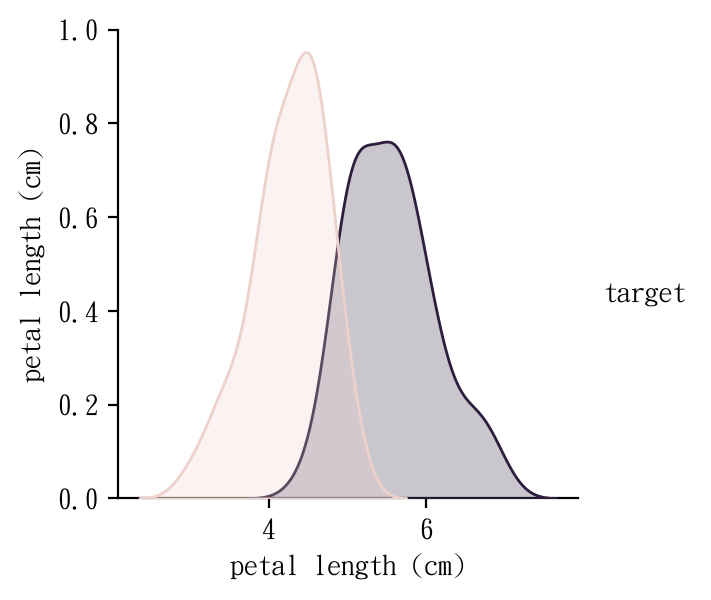

In [168]:
ax = sns.pairplot(df,hue='target',
             vars=['petal length (cm)'], size=3)

In [169]:
df.corr().round(2)['target']

sepal width (cm)     0.31
petal length (cm)    0.79
target               1.00
Name: target, dtype: float64

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

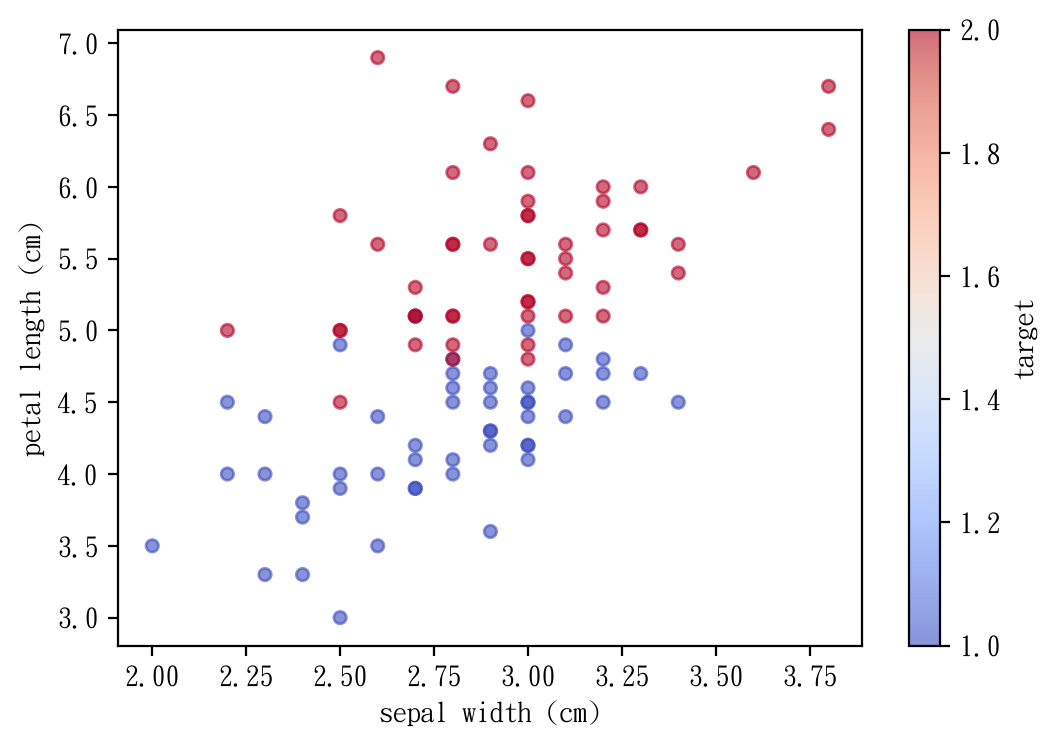

In [170]:
df.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)',
       c='target', cmap='coolwarm', alpha=0.6, figsize=(6,4))

In [171]:
X_cols = ['sepal width (cm)', 'petal length (cm)']
y_col = 'target'
X = df[X_cols]
y = df[y_col]

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [173]:
print('訓練集的筆數：',len(X_train))
print('測試集的筆數：',len(X_test))
print('測試集所佔全部資料的百分比：',len(X_test)/len(X))

訓練集的筆數： 67
測試集的筆數： 33
測試集所佔全部資料的百分比： 0.33


In [174]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [175]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [176]:
model.coef_

array([[-2.48416603,  1.88759016]])

In [177]:
y_pred = model.predict(X_test)
y_pred[:5]

array([2, 2, 2, 1, 1])

In [178]:
pd.DataFrame(zip(y_test, y_pred), columns=['實際','預測']).head()

,實際,預測
0,2,2
1,2,2
2,2,2
3,1,1
4,1,1


In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, index=['實際1', '實際2'], columns=['預測1', '預測2']))
print()
print('整體正確率:', accuracy_score(y_test, y_pred).round(2))
# 另一個快速得到正確率的方法
print('另一個得到正確率的方法', model.score(X_test, y_test).round(2))

     預測1  預測2
實際1   12    7
實際2    1   13

整體正確率: 0.76
另一個得到正確率的方法 0.76


In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model_pl = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, index=['實際1', '實際2'], columns=['預測1', '預測2']))
print()
print('整體正確率:',accuracy_score(y_test, y_pred).round(2))

     預測1  預測2
實際1   17    2
實際2    3   11

整體正確率: 0.85


In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.89      0.87        19
           2       0.85      0.79      0.81        14

    accuracy                           0.85        33
   macro avg       0.85      0.84      0.84        33
weighted avg       0.85      0.85      0.85        33



In [182]:
y_test_proba = model_pl.predict_proba(X_test.iloc[:5])
pd.DataFrame(y_test_proba, columns=['預測1的機率', '預測2的機率'])

,預測1的機率,預測2的機率
0,0.263081,0.736919
1,0.056462,0.943538
2,0.059512,0.940488
3,0.939655,0.060345
4,0.909115,0.090885


In [183]:
y_pred_proba = model_pl.predict_proba(X_test)[:,1]
y_pred_8 = np.where(y_pred_proba>=0.8, 2, 1)
y_pred_8[:5]

array([1, 2, 2, 1, 1])

In [184]:
print('正確率：', accuracy_score(y_test, y_pred_8).round(2))
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_8),
                   index=['實際1', '實際2'], columns=['預測1', '預測2']))
print('綜合報告')
print(classification_report(y_test, y_pred_8))

正確率： 0.82
混亂矩陣
     預測1  預測2
實際1   19    0
實際2    6    8
綜合報告
              precision    recall  f1-score   support

           1       0.76      1.00      0.86        19
           2       1.00      0.57      0.73        14

    accuracy                           0.82        33
   macro avg       0.88      0.79      0.80        33
weighted avg       0.86      0.82      0.81        33



In [185]:
from sklearn.metrics import precision_score, recall_score
scores = []
# 先用[:,1]取得類別2的預測機率
y_pred_proba = model_pl.predict_proba(X_test)[:,1]
# 將判斷門檻從0, 0.1, 0.2, ...到1
for threshold in np.arange(0, 1, 0.1):
    # 透過np.where取得不同判斷門檻的預測結果
    y_pred = np.where(y_pred_proba>=threshold, 2, 1)
    prec = precision_score(y_test, y_pred, pos_label=2)
    recall = recall_score(y_test, y_pred, pos_label=2)
    # 將所有結果存在scores串列
    scores.append([threshold, prec, recall])
df_p_r = pd.DataFrame(scores, columns=['門檻','精確率','召回率'])
df_p_r.sort_values(by='門檻')

,門檻,精確率,召回率
0,0.0,0.424242,1.000000
1,0.1,0.636364,1.000000
2,0.2,0.666667,1.000000
3,0.3,0.777778,1.000000
4,0.4,0.764706,0.928571
5,0.5,0.846154,0.785714
6,0.6,0.833333,0.714286
7,0.7,0.909091,0.714286
8,0.8,1.000000,0.571429
9,0.9,1.000000,0.500000


<Axes: xlabel='類別2召回率', ylabel='類別2精確率'>

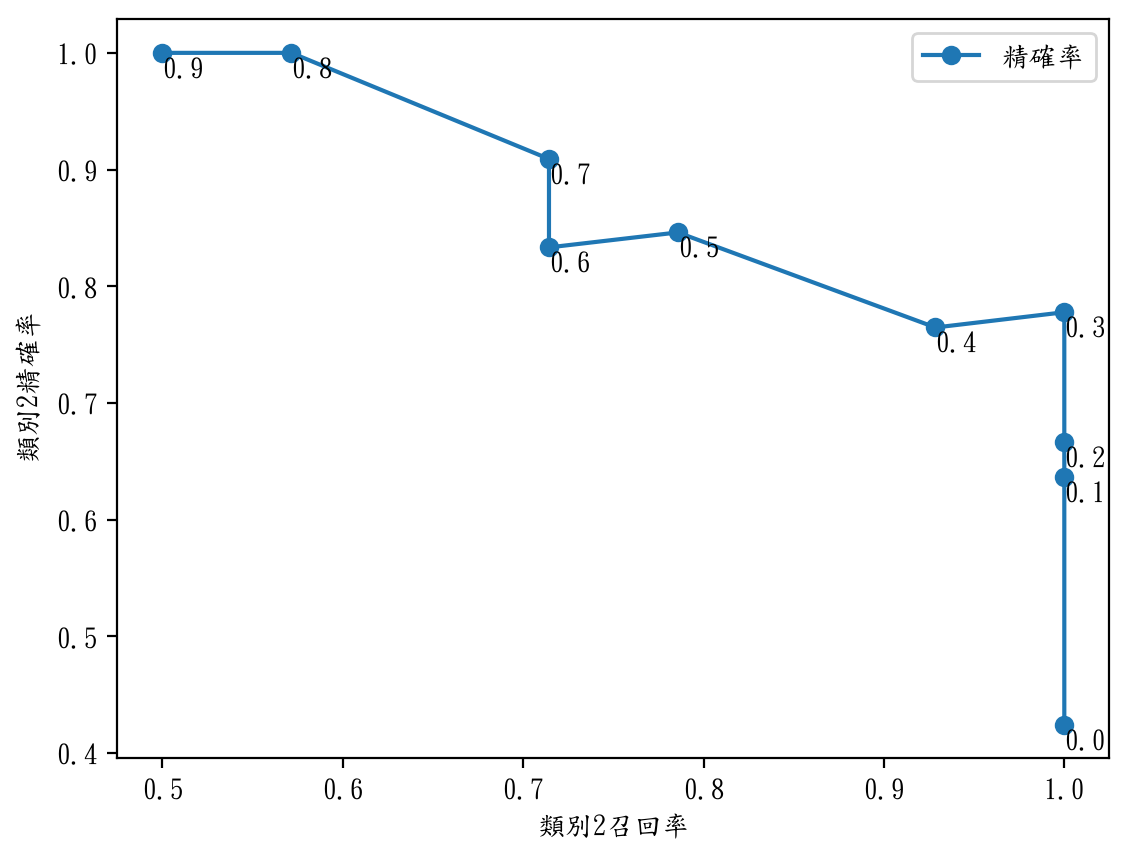

In [186]:
ax = df_p_r.plot(x='召回率', y='精確率', marker='o')
ax.set_xlabel('類別2召回率')
ax.set_ylabel('類別2精確率')
for idx in df_p_r.index:
    ax.text(x=df_p_r.loc[idx,'召回率'], y=df_p_r.loc[idx,'精確率']-0.02,
            s=df_p_r.loc[idx,'門檻'].round(1))
ax

,門檻,精確率,召回率
26,0.943538,1.0,0.357143
27,0.990069,1.0,0.285714
28,0.992587,1.0,0.214286
29,0.998551,1.0,0.142857
30,0.999267,1.0,0.071429


<Axes: xlabel='召回率'>

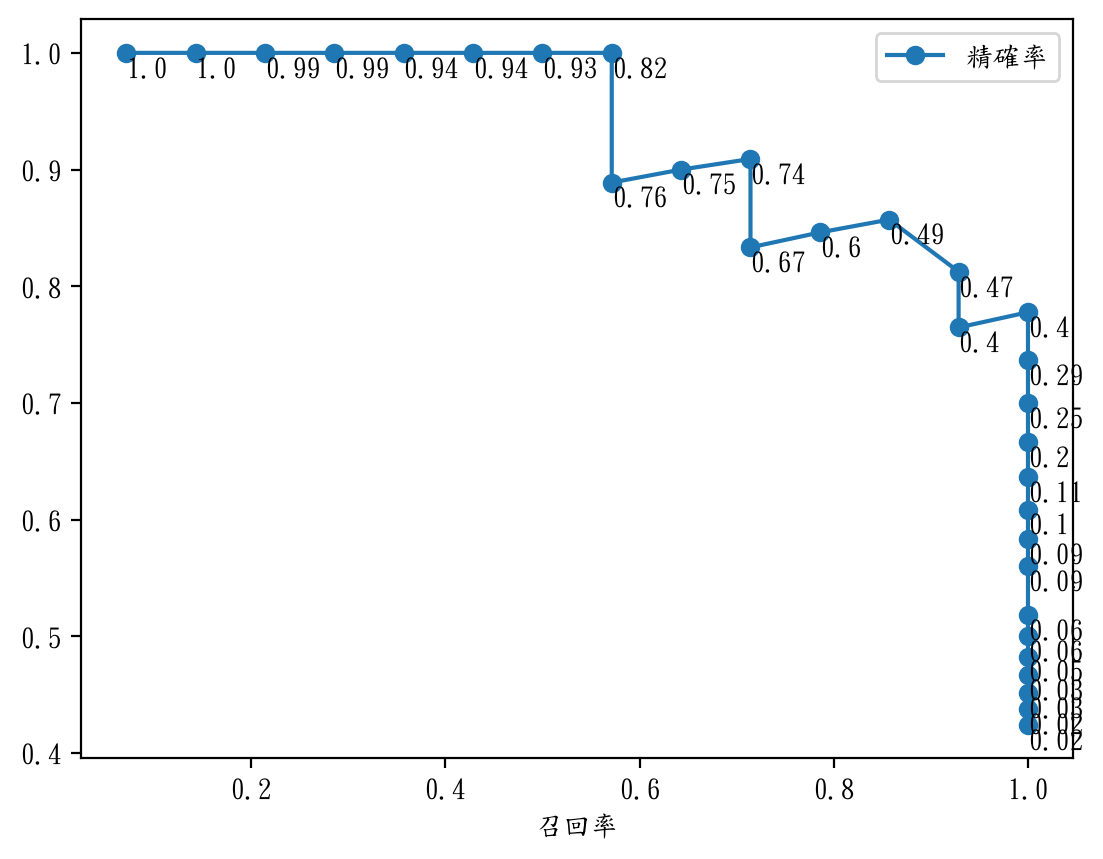

In [187]:
from sklearn.metrics import precision_recall_curve
# precision_recall_curve的輸入參數是機率值
prec, recall, thres = precision_recall_curve(y_test, y_pred_proba, pos_label=2)
df_p_r = pd.DataFrame(zip(thres, prec, recall), columns=['門檻','精確率','召回率'])
# 判斷門檻最大的前五筆
display(df_p_r.tail())
ax = df_p_r.plot(x='召回率', y='精確率', marker='o');
for idx in df_p_r.index:
    ax.text(x=df_p_r.loc[idx,'召回率'], y=df_p_r.loc[idx,'精確率']-0.02,
            s=df_p_r.loc[idx,'門檻'].round(2))
ax

In [188]:
from sklearn.metrics import recall_score
scores = []
y_pred_proba = model_pl.predict_proba(X_test)[:,1]
for threshold in np.arange(0, 1, 0.1):
    y_pred = np.where(y_pred_proba>=threshold, 2, 1)
    # tpr為類別2的召回率
    tpr = recall_score(y_test, y_pred, pos_label=2)
    # fpr為類別1的召回錯誤率
    fpr = 1 - recall_score(y_test, y_pred, pos_label=1)
    scores.append([threshold, tpr, fpr])
df_roc = pd.DataFrame(scores, columns=['門檻','敏感度','1-特異度'])
df_roc.sort_values(by='門檻').head()

,門檻,敏感度,1-特異度
0,0.0,1.000000,1.000000
1,0.1,1.000000,0.421053
2,0.2,1.000000,0.368421
3,0.3,1.000000,0.210526
4,0.4,0.928571,0.210526


<Axes: xlabel='1-特異度'>

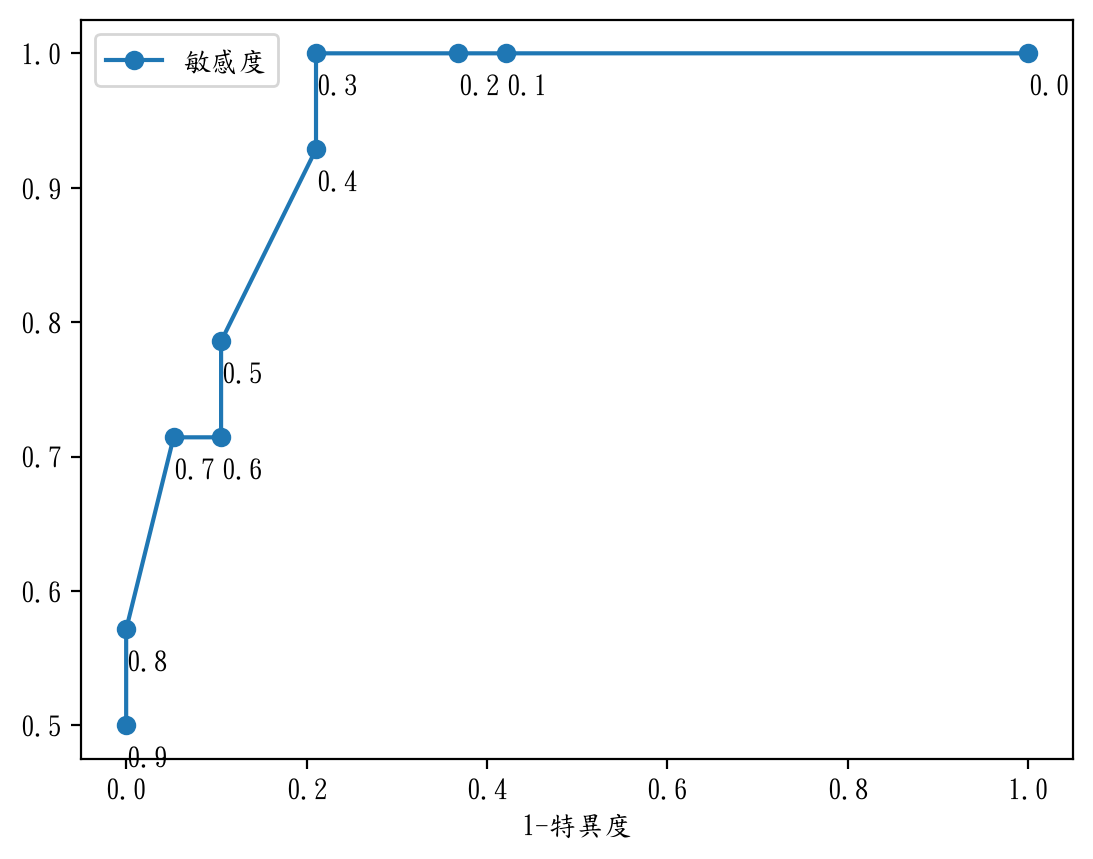

In [189]:
ax = df_roc.plot(x='1-特異度', y='敏感度', marker='o')
for idx in df_roc.index:
    ax.text(x=df_roc.loc[idx,'1-特異度'], y=df_roc.loc[idx,'敏感度']-0.03,
            s=df_roc.loc[idx,'門檻'].round(1))
ax

,門檻,1-特異度,敏感度
0,1.999267,0.000000,0.000000
1,0.999267,0.000000,0.071429
2,0.821775,0.000000,0.571429
3,0.764504,0.052632,0.571429
4,0.736919,0.052632,0.714286


<Axes: xlabel='1-特異度'>

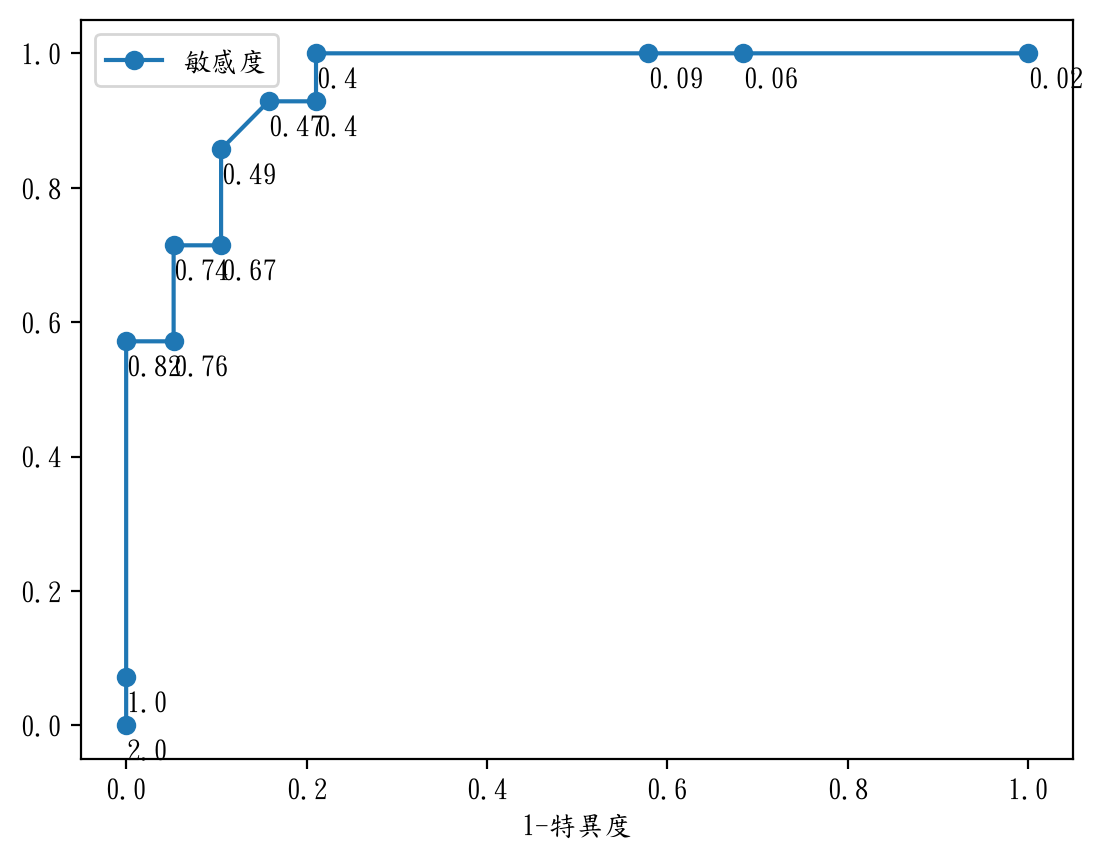

In [190]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba, pos_label=2)
df_roc = pd.DataFrame(zip(thres, fpr, tpr), columns=['門檻','1-特異度','敏感度'])
display(df_roc.head())
ax = df_roc.plot(x='1-特異度', y='敏感度', marker='o')
for idx in df_roc.index:
    ax.text(x=df_roc.loc[idx,'1-特異度'], y=df_roc.loc[idx,'敏感度']-0.05,
            s=df_roc.loc[idx,'門檻'].round(2))
ax

In [191]:
from sklearn.metrics import roc_auc_score, auc, roc_curve
roc_auc_score(y_test, y_pred_proba)
# fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=2)
# auc(fpr, tpr)

0.9530075187969924

In [192]:
def plot_decision_boundary(X_test, y_test, model, debug=False):
    points = 500
    x1_max, x2_max = X_test.max()
    x1_min, x2_min = X_test.min()
    X1, X2 = np.meshgrid(np.linspace(x1_min-0.1, x1_max+0.1, points),
                        np.linspace(x2_min-0.1, x2_max+0.1, points))
    x1_label, x2_label = X_test.columns
    fig, ax = plt.subplots()
    X_test.plot(kind='scatter', x=x1_label, y=x2_label, c=y_test, cmap='coolwarm',
                colorbar=False, figsize=(6,4), s=30, ax=ax)
    grids = np.array(list(zip(X1.ravel(), X2.ravel())))
    ax.contourf(X1, X2, model.predict(grids).reshape(X1.shape), alpha=0.3,
               cmap='coolwarm')
    if debug:
        df_debug = X_test.copy()
        df_debug['y_test'] = y_test
        y_pred = model.predict(X_test)
        df_debug['y_pred'] = y_pred
        df_debug = df_debug[y_pred != y_test]
        df_debug.plot(kind='scatter', x=x1_label, y=x2_label,
                      s=50,  color='none', edgecolor='y', ax=ax)
        for i in df_debug.index:
            ax.text(s=df_debug.loc[i,'y_test'], x=df_debug.loc[i, x1_label]+0.01,
                       y=df_debug.loc[i, x2_label]-0.05)

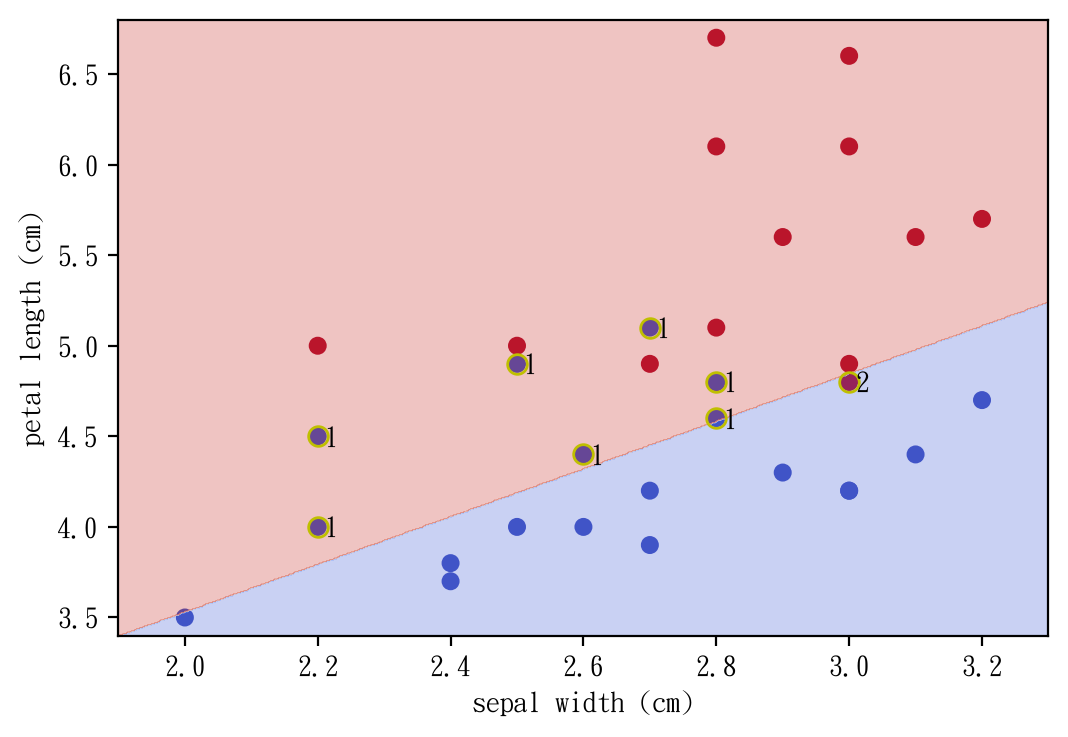

In [193]:
plot_decision_boundary(X_test, y_test, model, debug = True)

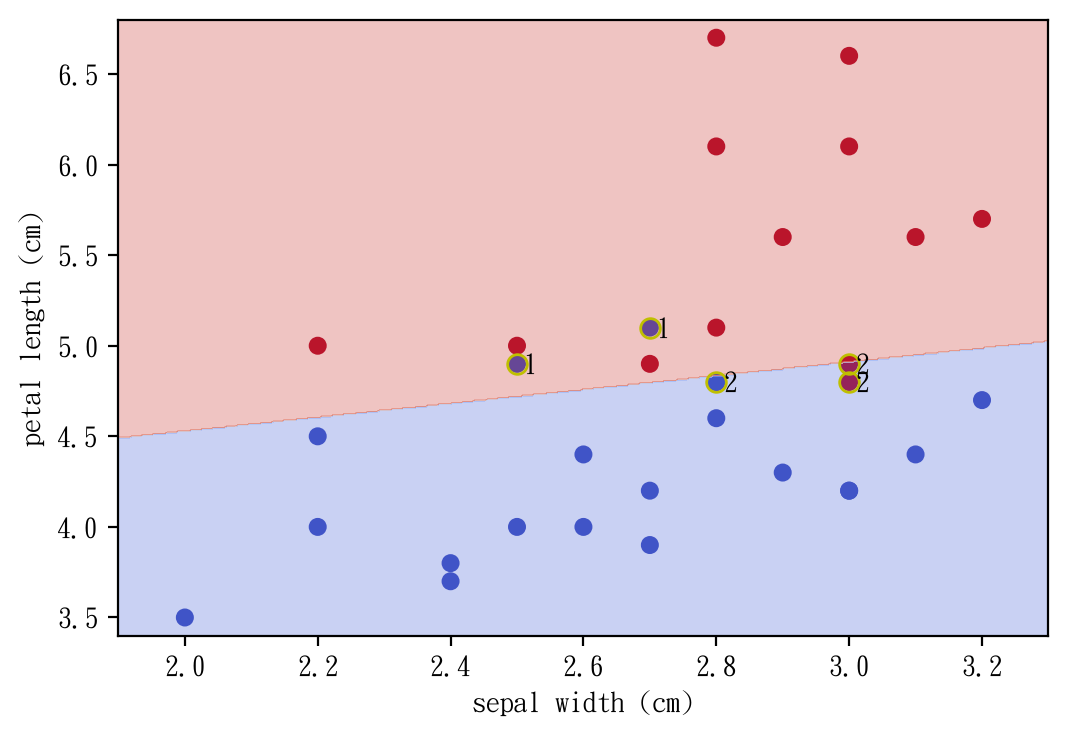

In [194]:
plot_decision_boundary(X_test, y_test, model_pl, debug = True)

In [195]:
df[(df['sepal width (cm)'] == 2.8) & (df['petal length (cm)'] == 4.8)]

,sepal width (cm),petal length (cm),target
76,2.8,4.8,1
126,2.8,4.8,2


In [196]:
model_pl.predict([[100,10]])

array([1])

## 作業

1. 請用本章的資料來檢視precision_recall_curve的輸出結果是正確的。做法如下，請先取得precision_recall_curve回傳的判斷門檻thres的值，再自己寫廻圈來驗證精確率和召回率。

2. 請用本章的資料來檢視roc_curve函數的輸出結果是正確的。做法如下，請先取得roc_curve回傳的判斷門檻thres的值，再自己寫廻圈來驗證1-特異度和敏感度。

3. 用鳶尾花全部的欄位來做羅吉斯迴歸模型預測，請將資料做標準化，並輸出正確率、混亂矩陣和綜合報告。

4. 承上例，請依照上例的預測結果，自己寫程式來製作混亂矩陣。提示：用groupby